In [1]:
import numpy as np


In [ ]:
# Multivariate Gaussian Theorem to learn

In [14]:
f = np.zeros(4)
f[0] = 150
f[1] = 200
f

array([150., 200.,   0.,   0.])

In [15]:
# In Gaussian Process we are going to use the nomenclature of the multivariate gaussian
# We want to predict p(f*|f), been f* the output to guess and f the label of the training data
# From Multivariate Gaussian Theorem :


$$p(x_{1}|x_{2}) = \mathcal{N}(x_{1}|\mu_{1|2}\cdot\Sigma_{1|2})$$
$$\mu_{1|2} = \mu_{1} + \mu_{1} + \Sigma_{12}\Sigma_{22}^{-1}(x_{2}-\mu_{2})$$
$$\Sigma_{1|2} = \Sigma_{11} - \Sigma_{1|2} - \Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21} = \Lambda_{11}^{-1}$$

In [16]:
#EXAMPLE
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = np.sin(Xtrain)      # Our output labels.


In [23]:
np.sum(Xtrain**2,1).reshape(-1,1)

np.dot(Xtrain,ytrain.T)

array([[-3.02720998,  0.56448003,  3.63718971,  3.36588394, -3.36588394],
       [-2.27040749,  0.42336002,  2.72789228,  2.52441295, -2.52441295],
       [-1.51360499,  0.28224002,  1.81859485,  1.68294197, -1.68294197],
       [-0.7568025 ,  0.14112001,  0.90929743,  0.84147098, -0.84147098],
       [ 0.7568025 , -0.14112001, -0.90929743, -0.84147098,  0.84147098]])

In [19]:
# 50 Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)


In [20]:
# A kernel function (aka Gaussian) measuring the similarity between a and b. 1 means the same.
def kernel(a, b, param):
    sqdist = np.sum(a**2,1).reshape(-1,1) + np.sum(b**2,1) - 2*np.dot(a, b.T) # Matrix version of (A-B)^2
    return np.exp(-.5 * (1/param) * sqdist)


$$K = e^{-\frac{1}{2}(\frac{(A-B)^2}{param})}$$

In [25]:
param = 1

K = kernel(Xtrain, Xtrain, param)                        # Shape (5, 5)
K_s = kernel(Xtrain, Xtest, param)                       # Shape (5, 50)
K_ss = kernel(Xtest, Xtest, param)   

In [27]:
K
# K is Kernel(A,A) = diag(I) + crosscorrelated terms

array([[1.00000000e+00, 6.06530660e-01, 1.35335283e-01, 1.11089965e-02,
        3.72665317e-06],
       [6.06530660e-01, 1.00000000e+00, 6.06530660e-01, 1.35335283e-01,
        3.35462628e-04],
       [1.35335283e-01, 6.06530660e-01, 1.00000000e+00, 6.06530660e-01,
        1.11089965e-02],
       [1.11089965e-02, 1.35335283e-01, 6.06530660e-01, 1.00000000e+00,
        1.35335283e-01],
       [3.72665317e-06, 3.35462628e-04, 1.11089965e-02, 1.35335283e-01,
        1.00000000e+00]])

In [33]:
# If a matrix A is Hermitian and positive definite then (Hermitian)A = transpose((conjugated(A))), 
#then CHOLESKY A=Ltransp(L) exist

L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain)))  # Shape (5, 5)

In [34]:
L

array([[1.00002500e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [6.06515497e-01, 7.95103108e-01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [1.35331900e-01, 6.59599692e-01, 7.39366974e-01, 0.00000000e+00,
        0.00000000e+00],
       [1.11087188e-02, 1.61737103e-01, 6.74016516e-01, 7.20742285e-01,
        0.00000000e+00],
       [3.72656001e-06, 4.19068179e-04, 1.46504718e-02, 1.73977309e-01,
        9.84665976e-01]])

In [35]:
# Compute the mean at our test points.
Lk = np.linalg.solve(L, K_s)                             # Shape (5, 50)
mu = np.dot(Lk.T, np.linalg.solve(L, ytrain)).reshape((n,)) # Shape (50, )

# This comes from multivariate gaussian theorem : 

If $\mu_{*} = K_{s}^{T}K^{-1}y_{train}$, then as $(AB)^{-1} = B^{-1}A^{-1}$ so: $K= LL^{T} \rightarrow K^{-1} = (LL^{T})^{-1} = (L^{T})^{-1}L^{-1}$ and then : 
$$\mu_{*} = K_{s}^{T}(L^{T})^{-1}L^{-1}y_{train}$$

And we know that Lk = np.linalg.solve(L,K_s) -> $Lk = L^{-1}K_s$ and as $(AB)^{T} = B^{T}A^{T}$ and $(A^{T})^{-1} = (A^{-1})^{T}$ then $Lk.T = K_s^{T}(L^{T})^{-1}$

In [36]:
# Compute the standard deviation.
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)               # Shape (50, )
stdv = np.sqrt(s2)  

In [38]:
np.diag(L)

array([1.000025  , 0.79510311, 0.73936697, 0.72074229, 0.98466598])

In [39]:
L = np.linalg.cholesky(K_ss + 1e-6*np.eye(n) - np.dot(Lk.T, Lk))    # Shape (50, 50)
f_post = mu.reshape(-1,1) + np.dot(L, np.random.normal(size=(n,5))) # Shape (50, 3)


Based on Multivariate Gaussian Theorem : $\Sigma_{*} = K_{ss} - K_{s}^{T}K^{-1}K_{s}$ so, as $Lk = L^{-1}K_{s}$ and $Lk^{T} = K_{s}^{T}(L^{T})^{-1}$ then $Lk^{T}Lk = K_{s}^{T}(L^{T})^{-1}L^{-1}K_{s} = K_{s}^{T}K^{-1}K_{s}$

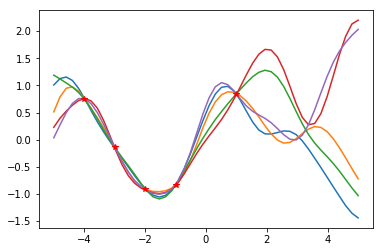

In [52]:
from matplotlib.pyplot import plot as plt

for i in range(5):
    plt(Xtest,f_post[:,i])

plt(Xtrain,ytrain,'r*')

In [49]:
f_post[:,1]

array([ 0.51194541,  0.78649383,  0.94654043,  0.97263837,  0.89065901,
        0.74641371,  0.57585059,  0.40400333,  0.22324613,  0.03245608,
       -0.18152848, -0.3959713 , -0.59742882, -0.7590826 , -0.86729083,
       -0.92746847, -0.95274014, -0.95679598, -0.94082388, -0.89205699,
       -0.79419142, -0.62160713, -0.37899937, -0.09002523,  0.21709883,
        0.48679154,  0.69538471,  0.82634461,  0.88059529,  0.87214646,
        0.81122019,  0.70972212,  0.57714269,  0.42156249,  0.25514285,
        0.10534157, -0.0069242 , -0.06314041, -0.05068041,  0.01742315,
        0.11039232,  0.19408237,  0.24026746,  0.2253165 ,  0.14747171,
        0.01638752, -0.15036513, -0.33790971, -0.53267176, -0.72061892])